In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv(r"/content/new_insurance_data.csv")

In [ ]:
df.head()


,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
df.shape

(1338, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
len(df)*0.10

133.8

In [ ]:
for i in df.select_dtypes(include=["float64"]).columns:
  if  (df[i].skew()>0.5):
    print(i,"skewed")
    df[i]=df[i].fillna(df[i].median())
  else:
    print(i,"normal")
    df[i]=df[i].fillna(df[i].mean())

age normal
bmi normal
children skewed
Claim_Amount normal
past_consultations normal
num_of_steps normal
Hospital_expenditure skewed
NUmber_of_past_hospitalizations normal
Anual_Salary skewed
charges skewed


age


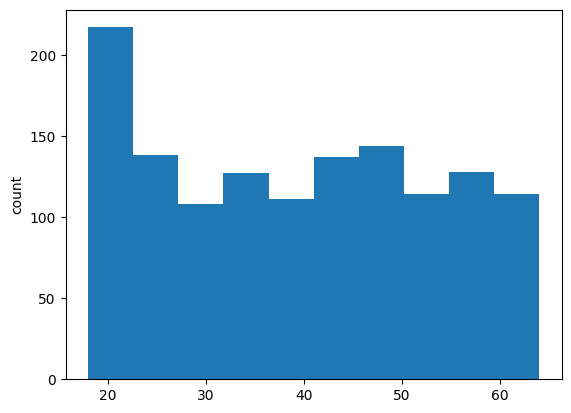

bmi


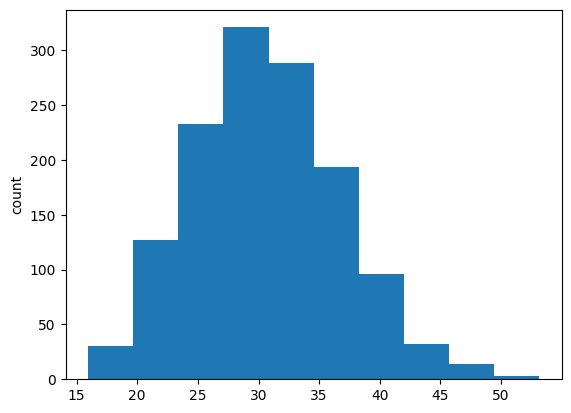

children


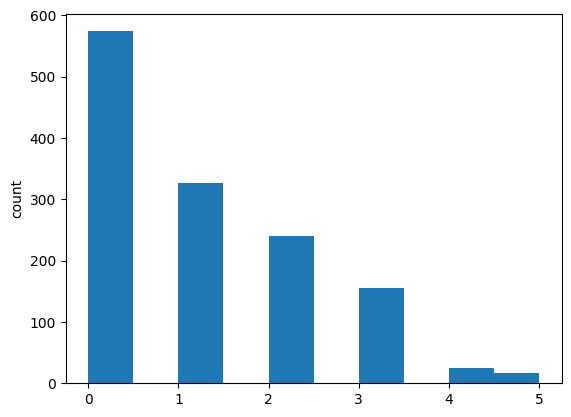

Claim_Amount


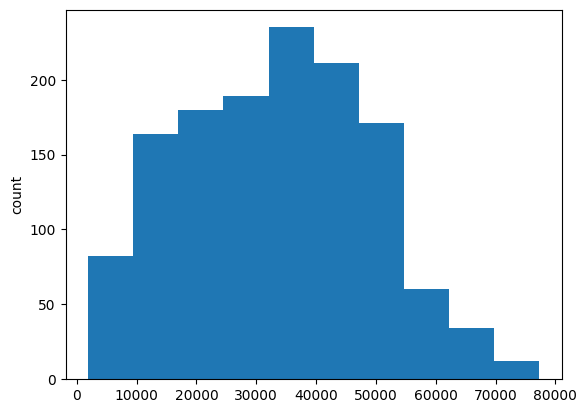

past_consultations


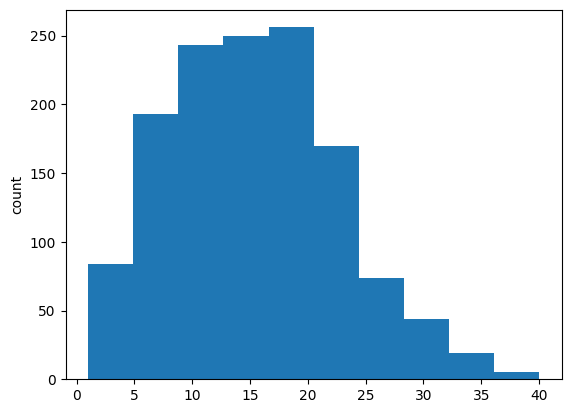

num_of_steps


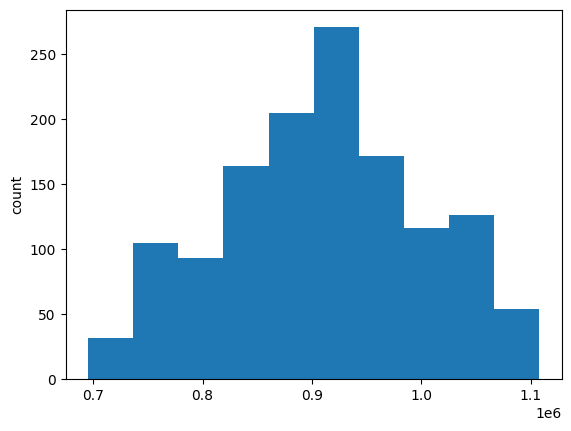

Hospital_expenditure


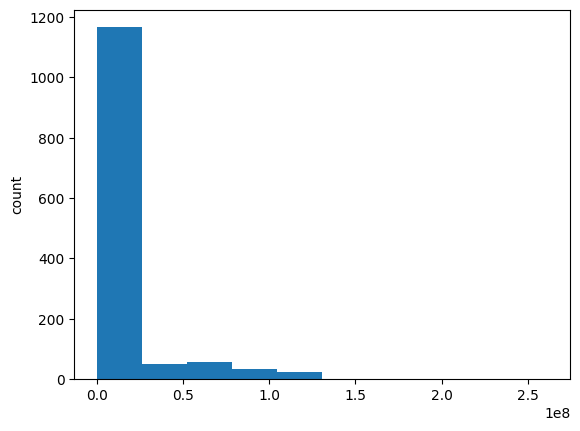

NUmber_of_past_hospitalizations


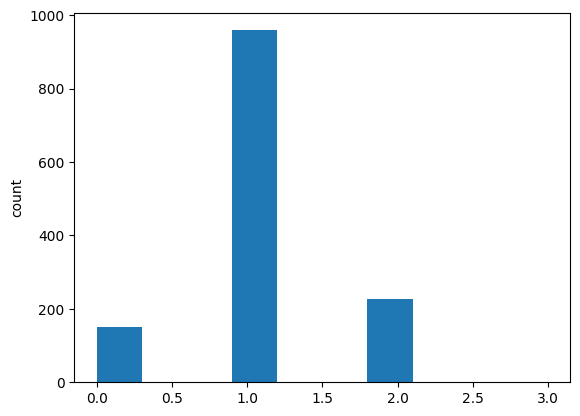

Anual_Salary


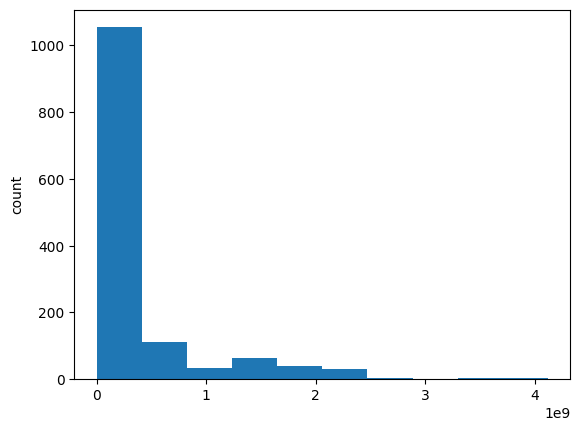

charges


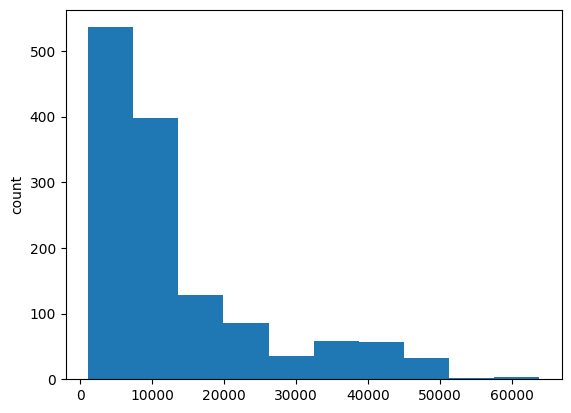

In [ ]:
for i in df.select_dtypes(include=["float64"]).columns:
  plt.hist(df[i])
  print(i)
  plt.ylabel("count")
  plt.show()

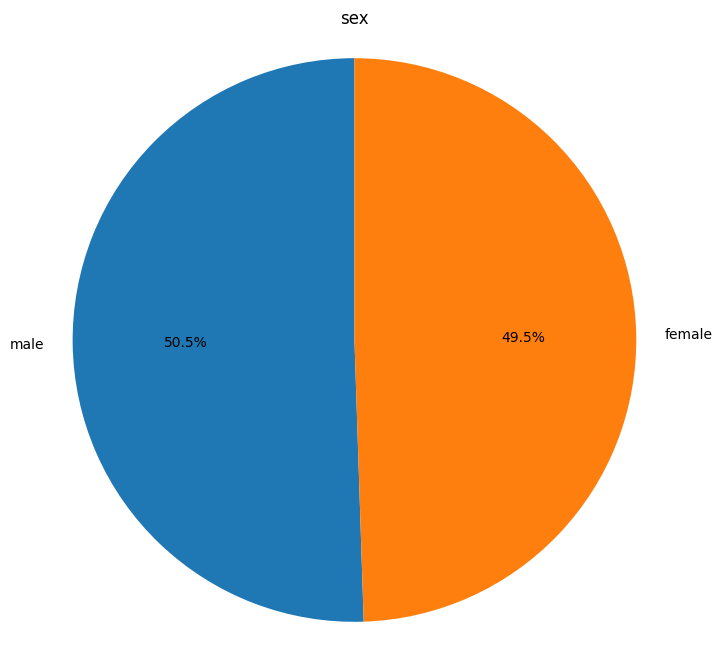

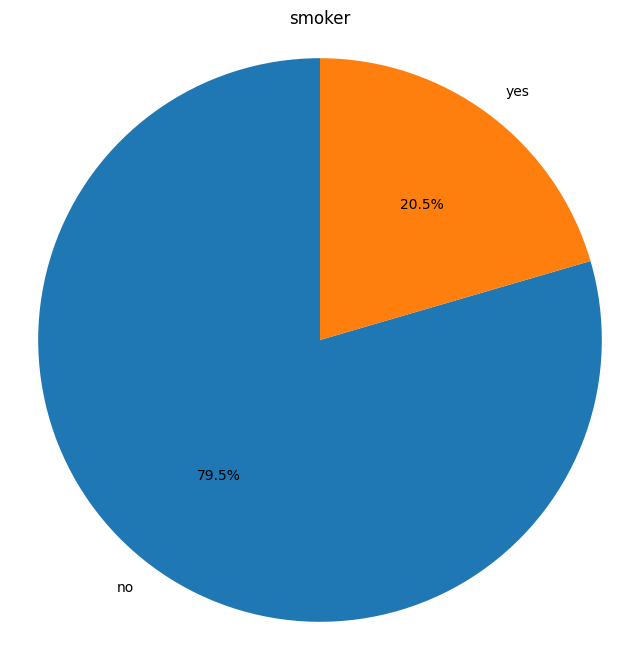

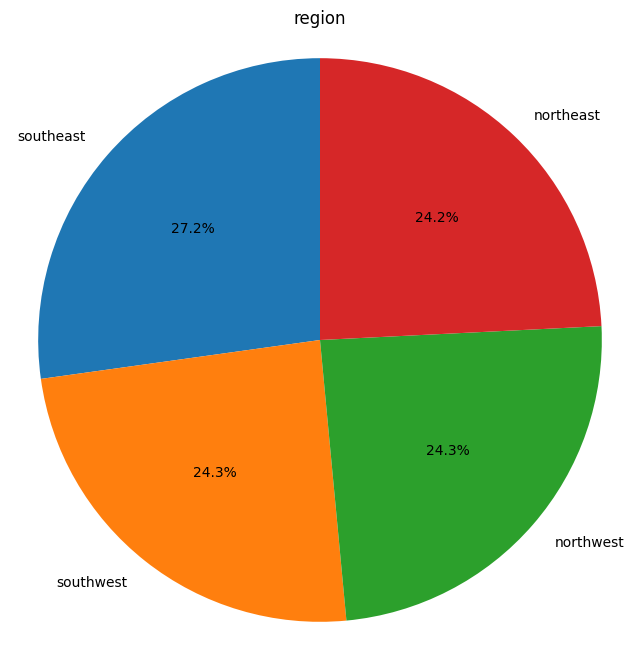

In [ ]:
for i in df.select_dtypes(include=["object"]):
  plt.figure(figsize=(8,8))
  cnt=df[i].value_counts()
  plt.title(i)
  plt.pie(cnt,labels=cnt.index,autopct="%1.1f%%",startangle=90)
  plt.axis("equal")
  plt.show()


In [ ]:
y=df.iloc[:,-1]
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1333,55135.40209
1334,58571.07448
1335,60021.39897
1336,62592.87309


age


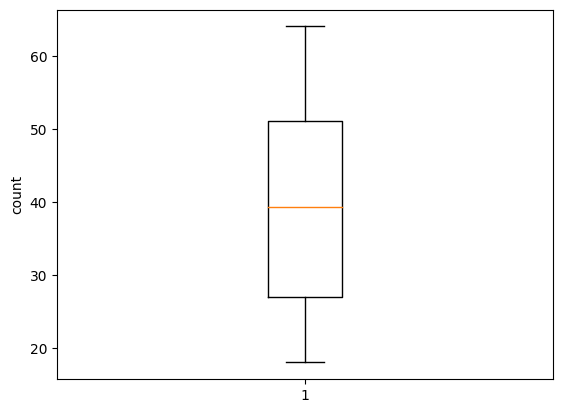

bmi


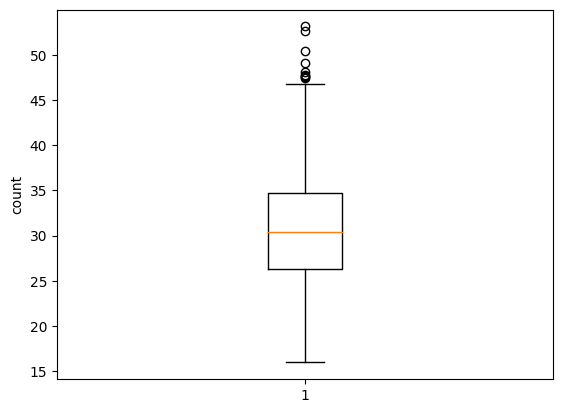

children


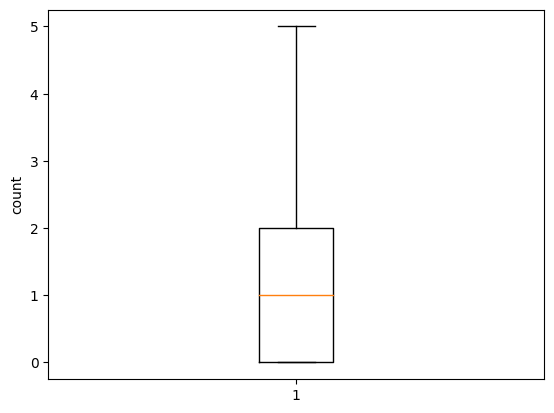

Claim_Amount


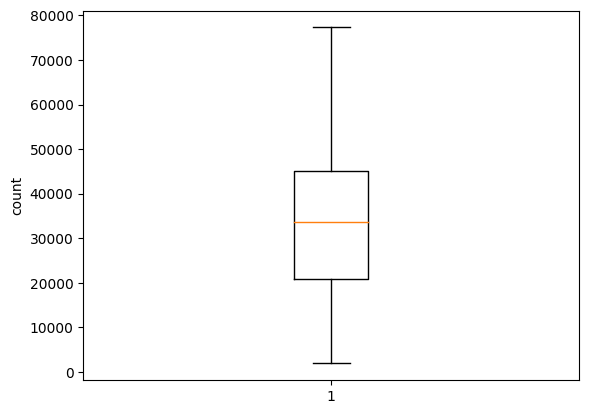

past_consultations


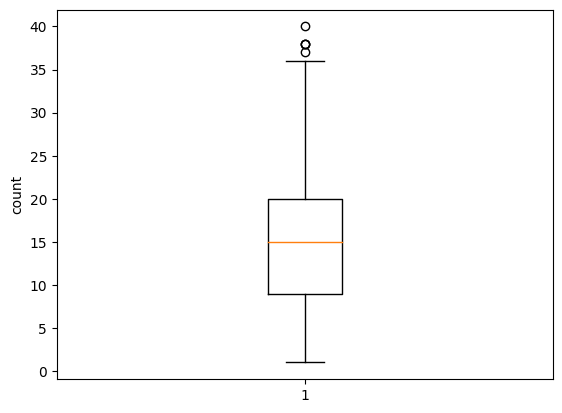

num_of_steps


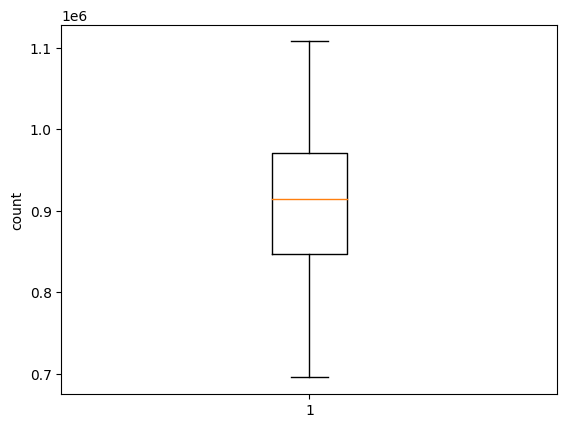

Hospital_expenditure


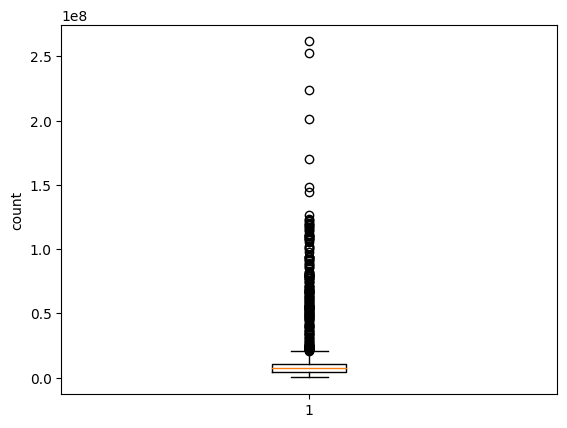

NUmber_of_past_hospitalizations


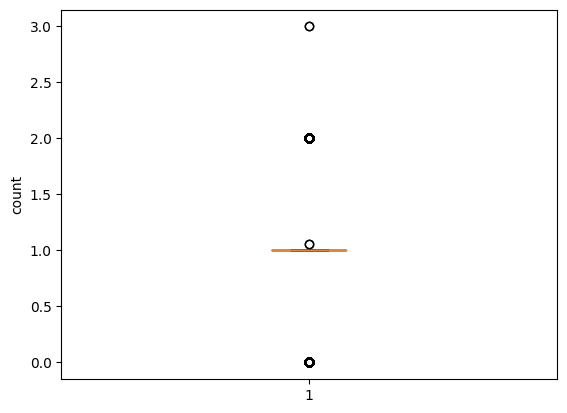

Anual_Salary


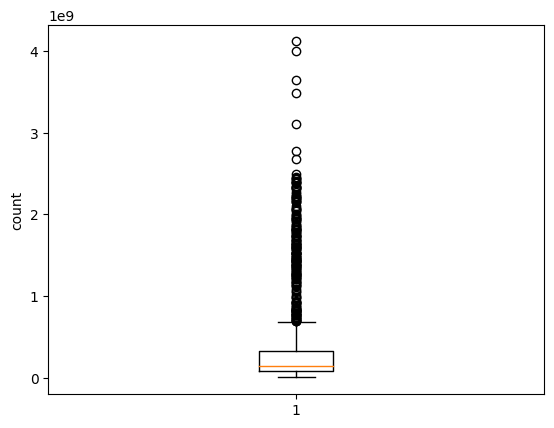

charges


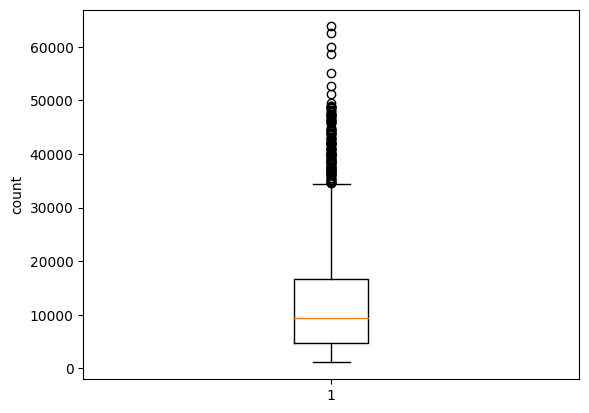

In [ ]:
for i in df.select_dtypes(include=["float64"]).columns:
  plt.boxplot(df[i])
  print(i)
  plt.ylabel("count")
  plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in df.columns:
  if((df[i].dtype!="object"))& (i!="charges"):
    var_inflation.append(i)
x=df[var_inflation]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,11.964654
1,bmi,25.997490
2,children,1.947676
3,Claim_Amount,6.915357
4,past_consultations,8.334355
5,num_of_steps,60.099529
6,Hospital_expenditure,17.696072
7,NUmber_of_past_hospitalizations,15.879141
8,Anual_Salary,23.620761


In [ ]:
df=df.drop(["num_of_steps"],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in df.columns:
  if((df[i].dtype!="object"))& (i!="charges"):
    var_inflation.append(i)
x=df[var_inflation]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,10.150737
1,bmi,11.689672
2,children,1.931458
3,Claim_Amount,6.372826
4,past_consultations,7.537785
5,Hospital_expenditure,17.570374
6,NUmber_of_past_hospitalizations,13.759175
7,Anual_Salary,23.594703


In [ ]:
df=df.drop(["age"],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in df.columns:
  if((df[i].dtype!="object"))& (i!="charges"):
    var_inflation.append(i)
x=df[var_inflation]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,bmi,9.410443
1,children,1.928047
2,Claim_Amount,6.333564
3,past_consultations,7.429662
4,Hospital_expenditure,17.546456
5,NUmber_of_past_hospitalizations,11.371094
6,Anual_Salary,23.031438


In [ ]:
df=df.drop(["bmi"],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in df.columns:
  if((df[i].dtype!="object"))& (i!="charges"):
    var_inflation.append(i)
x=df[var_inflation]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,children,1.913228
1,Claim_Amount,5.260679
2,past_consultations,6.147194
3,Hospital_expenditure,16.879474
4,NUmber_of_past_hospitalizations,9.662515
5,Anual_Salary,20.671274


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x

,children,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,0.0,29087.54313,17.0,4.720921e+06,0.0,5.578497e+07
1,0.0,39053.67437,7.0,4.329832e+06,0.0,1.370089e+07
2,0.0,39023.62759,19.0,6.884861e+06,0.0,7.352311e+07
3,0.0,28185.39332,11.0,4.274774e+06,0.0,7.581968e+07
4,0.0,14697.85941,16.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...
1333,0.0,63142.25346,32.0,1.703805e+08,2.0,3.101107e+09
1334,1.0,43419.95227,31.0,2.015152e+08,2.0,3.484216e+09
1335,3.0,52458.92353,25.0,2.236450e+08,2.0,3.640807e+09
1336,0.0,69927.51664,34.0,2.528924e+08,3.0,4.006359e+09


In [ ]:
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1333,55135.40209
1334,58571.07448
1335,60021.39897
1336,62592.87309


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=0)
x_train

,children,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
621,2.0,14184.67664,22.0,6.512320e+06,1.0,7.564824e+07
194,2.0,43988.96850,11.0,2.418227e+06,1.0,1.074332e+08
240,1.0,22987.02313,20.0,4.956462e+06,1.0,9.120422e+07
1168,1.0,27534.30280,15.0,2.543862e+07,2.0,8.690106e+08
1192,0.0,38838.01180,19.0,4.202504e+07,2.0,1.159497e+09
...,...,...,...,...,...,...
763,0.0,18094.64393,20.0,1.052415e+07,1.0,1.393229e+08
835,0.0,30333.00033,21.0,3.445156e+06,1.0,1.422656e+08
1216,0.0,24969.29952,25.0,4.883718e+07,2.0,1.377813e+09
559,2.0,33330.50185,21.0,6.868865e+06,1.0,7.559974e+07


In [ ]:
x_train.shape

(1070, 6)

In [ ]:
y_train.shape

(1070,)

In [39]:
y_train

,charges
621,8604.48365
194,3056.38810
240,3594.17085
1168,28476.73499
1192,33900.65300
...,...
763,10923.93320
835,11856.41150
1216,36197.69900
559,7731.42710


In [ ]:
l_model=LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred=l_model.predict(x_test)
print(pred)

[ 9.53890151e+03  8.55636974e+03  9.36881092e+03  1.37129222e+04
  7.56076273e+03  1.13192156e+04  6.53367050e+02  3.83535755e+04
  3.73231338e+04  4.87454211e+04  7.08169183e+03  1.80315566e+04
  4.09818272e+04  6.75093692e+03  1.22192424e+04  1.05022306e+04
  8.30891365e+03  3.38898932e+02  2.92176985e+04  1.37345412e+04
  1.25232371e+04  9.55223068e+03  1.64742103e+04  1.00337067e+04
  1.53696967e+04  8.11695146e+03  4.19835158e+04  7.55159550e+03
  4.88453642e+03  7.97267396e+03  2.22410886e+03  7.91352405e+03
  1.02660528e+04  2.71021190e+03  1.41075776e+04  1.36451356e+04
  2.35823274e+04 -5.94797372e+02  1.04254985e+04  4.04262565e+04
  1.06093922e+04  1.71506161e+03  1.01207062e+04  1.68391857e+03
  7.41711558e+03  1.21540390e+04  8.06384685e+03  4.81301209e+04
  3.70296323e+04  1.14946619e+04  2.83191054e+04  3.32633900e+04
  1.80934016e+03  1.04651375e+04  7.39826300e+03  1.12279568e+04
  1.03611622e+04  1.05041503e+04  4.03028285e+04  8.38952892e+03
  1.00918857e+04  4.47527

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,pred))

0.9537337218167725


In [41]:
a = l_model.predict([[621	,8604.48365
,194	,3056.38810
,240	,3594.17085]])
print(a)

[1247211.98344533]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
